(scikit-image)=

# `scikit-image`: image processing

**Author**: _Emmanuelle Gouillart_

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

[scikit-image](https://scikit-image.org/) is a Python package dedicated
to image processing, using NumPy arrays as image objects.
This chapter describes how to use `scikit-image` for various image
processing tasks, and how it relates to other scientific Python
modules such as NumPy and SciPy.

:::{admonition} See also

For basic image manipulation, such as image cropping or simple
filtering, a large number of simple operations can be realized with
NumPy and SciPy only. See {ref}`basic-image`.

Note that you should be familiar with the content of the previous
chapter before reading the current one, as basic operations such as
masking and labeling are a prerequisite.
:::

## Introduction and concepts

Images are NumPy's arrays `np.ndarray`

::: {list-table} Terms

- - Pixels
  - array values: `a[2, 3]`

- - Channels
  - array dimensions

- - Image encoding
  - `dtype` (`np.uint8`, `np.uint16`, `np.float`)

- - Filters
  - functions (`numpy`, `skimage`, `scipy`)

:::

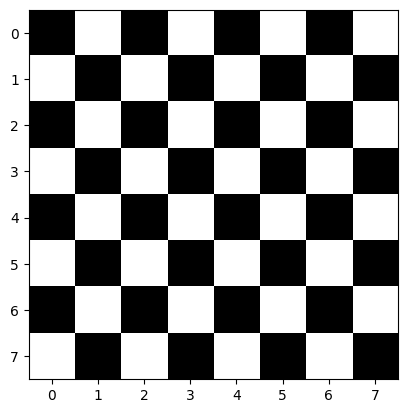

In [2]:
# This example shows how to create a simple checkerboard.
check = np.zeros((8, 8))
check[::2, 1::2] = 1
check[1::2, ::2] = 1
plt.imshow(check, cmap='gray', interpolation='nearest');

### `scikit-image` and the scientific Python ecosystem

`scikit-image` is packaged in both `pip` and `conda`-based
Python installations, as well as in most Linux distributions. Other
Python packages for image processing & visualization that operate on
NumPy arrays include:

::: {list-table} Other packages for working with images

- - {mod}`scipy.ndimage`
  - For N-dimensional arrays. Basic filtering, mathematical morphology,
    regions properties
- - [Mahotas](https://mahotas.readthedocs.io)
  - With a focus on high-speed implementations.
- - [Napari](https://napari.org)
  - A fast, interactive, multi-dimensional image viewer built in Qt.

:::

Some powerful C++ image processing libraries also have Python bindings:

::: {list-table} C++ libraries with Python bindings

- - [OpenCV](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)
  - A highly optimized computer vision library with a focus on real-time
    applications.
- - [ITK](https://www.itk.org)
  - The Insight ToolKit, especially useful for registration and working with
    3D images.

:::

To varying degrees, these C++-based libraries tend to be less Pythonic and
NumPy-friendly.

### What is included in scikit-image

- Website: <https://scikit-image.org/>
- Gallery of examples:
  <https://scikit-image.org/docs/stable/auto_examples/>

The library contains predominantly image processing algorithms, but
also utility functions to ease data handling and processing.
It contains the following submodules:

::: {list-table} Scikit-image submodules

- - {mod}`skimage.color`
  - Color space conversion.
- - {mod}`skimage.data`
  - Test images and example data.
- - {mod}`skimage.draw`
  - Drawing primitives (lines, text, etc.) that operate on NumPy arrays.
- - {mod}`skimage.exposure`
  - Image intensity adjustment, e.g., histogram equalization, etc.
- - {mod}`skimage.feature`
  - Feature detection and extraction, e.g., texture analysis corners, etc.
- - {mod}`skimage.filters`
  - Sharpening, edge finding, rank filters, thresholding, etc.
- - {mod}`skimage.graph`
  - Graph-theoretic operations, e.g., shortest paths.
- - {mod}`skimage.io`
  - Reading, saving, and displaying images and video.
- - {mod}`skimage.measure`
  - Measurement of image properties, e.g., region properties and contours.
- - {mod}`skimage.metrics`
  - Metrics corresponding to images, e.g. distance metrics, similarity, etc.
- - {mod}`skimage.morphology`
  - Morphological operations, e.g., opening or skeletonization.
- - {mod}`skimage.restoration`
  - Restoration algorithms, e.g., deconvolution algorithms, denoising, etc.
- - {mod}`skimage.segmentation`
  - Partitioning an image into multiple regions.
- - {mod}`skimage.transform`
  - Geometric and other transforms, e.g., rotation or the Radon transform.
- - {mod}`skimage.util`
  - Generic utilities.

:::

<!---
TODO Edit this section with a more refined discussion of the various
package features.
-->

## Importing

We import `scikit-image` using the convention:

In [3]:
import skimage as ski

Most functionality lives in subpackages, e.g.:

In [4]:
image = ski.data.cat()

You can list all submodules with:

In [5]:
for m in dir(ski): print(m)

__version__
color
data
draw
exposure
feature
filters
future
graph
io
measure
metrics
morphology
registration
restoration
segmentation
transform
util


Most `scikit-image` functions take NumPy `ndarrays` as arguments

In [6]:
camera = ski.data.camera()
camera.dtype

dtype('uint8')

In [7]:
camera.shape

(512, 512)

In [8]:
filtered_camera = ski.filters.gaussian(camera, sigma=1)
type(filtered_camera)

numpy.ndarray

## Example data

To start off, we need example images to work with.
The library ships with a few of these:

{mod}`skimage.data`

In [9]:
image = ski.data.cat()
image.shape

(300, 451, 3)

## Input/output, data types and colorspaces

I/O: {mod}`skimage.io`

Save an image to disk: {func}`skimage.io.imsave`

In [10]:
ski.io.imsave("cat.png", image)

Reading from files: {func}`skimage.io.imread`

In [11]:
cat = ski.io.imread("cat.png")

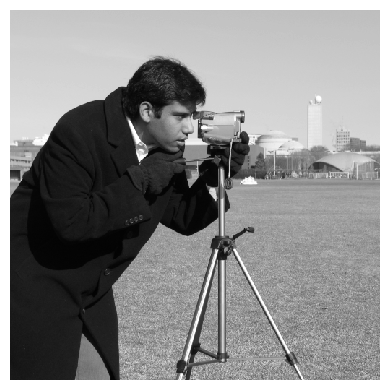

In [12]:
camera = ski.data.camera()

plt.figure(figsize=(4, 4))
plt.imshow(camera, cmap="gray", interpolation="nearest")
plt.axis("off")

plt.tight_layout()

This works with many data formats supported by the
[ImageIO](https://imageio.readthedocs.io) library.

Loading also works with URLs:

In [13]:
logo = ski.io.imread('https://scikit-image.org/_static/img/logo.png')

### Data types

Image ndarrays can be represented either by integers (signed or unsigned) or
floats.

Careful with overflows with integer data types

In [14]:
camera = ski.data.camera()
camera.dtype
camera_multiply = 3 * camera

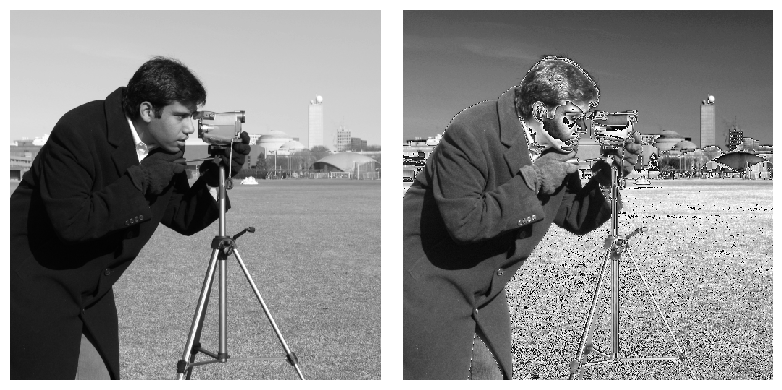

In [15]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(camera, cmap="gray", interpolation="nearest")
plt.axis("off")
plt.subplot(122)
plt.imshow(camera_multiply, cmap="gray", interpolation="nearest")
plt.axis("off")

plt.tight_layout()

Different integer sizes are possible: 8-, 16- or 32-bytes, signed or
unsigned.

**Warning**: An important (if questionable) `skimage` **convention**: float
images are supposed to lie in [-1, 1] (in order to have comparable contrast
for all float images):

In [16]:
camera_float = ski.util.img_as_float(camera)
camera.max(), camera_float.max()

(np.uint8(255), np.float64(1.0))

Some image processing routines need to work with float arrays, and may
hence output an array with a different type and the data range from the
input array

In [17]:
camera_sobel = ski.filters.sobel(camera)
camera_sobel.max()

np.float64(0.6447887988758096)

Utility functions are provided in {mod}`skimage` to convert both the
dtype and the data range, following skimage's conventions:
`util.img_as_float`, `util.img_as_ubyte`, etc.

See the [user guide](https://scikit-image.org/docs/stable/user_guide/data_types.html) for
more details.

### Colorspaces

Color images are of shape (N, M, 3) or (N, M, 4) (when an alpha channel
encodes transparency)

In [18]:
face = sp.datasets.face()
face.shape

(768, 1024, 3)

Routines converting between different colorspaces (RGB, HSV, LAB etc.)
are available in {mod}`skimage.color` : `color.rgb2hsv`, `color.lab2rgb`,
etc. Check the docstring for the expected dtype (and data range) of input
images.

:::{admonition} 3D images

Most functions of `skimage` can take 3D images as input arguments.
Check the docstring to know if a function can be used on 3D images
(for example MRI or CT images).

:::

::: {exercise-start}
:label: ski-grayscale-ex
:class: dropdown
:::

Open a color image on your disk as a NumPy array.

Find a skimage function computing the histogram of an image and
plot the histogram of each color channel

Convert the image to grayscale and plot its histogram.

::: {exercise-end}
:::

## Image preprocessing / enhancement

Goals: denoising, feature (edges) extraction, ...

### Local filters

Local filters replace the value of pixels by a function of the
values of neighboring pixels. The function can be linear or non-linear.

Neighbourhood: square (choose size), disk, or more complicated
_structuring element_.

![](../../advanced/image_processing/kernels.png)

Example : horizontal Sobel filter

In [19]:
text = ski.data.text()
hsobel_text = ski.filters.sobel_h(text)

Uses the following linear kernel for computing horizontal gradients:

```
 1   2   1
 0   0   0
-1  -2  -1
```

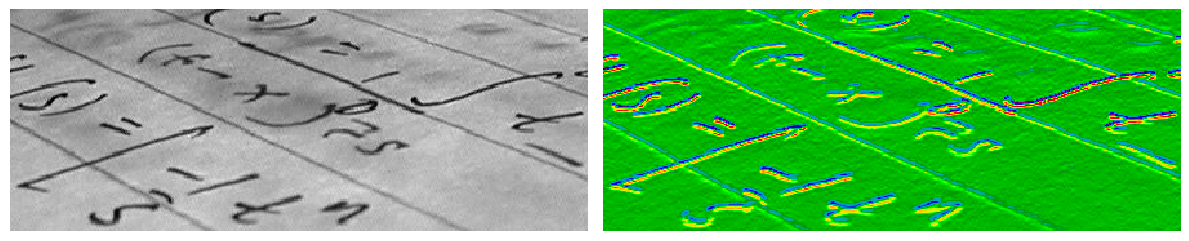

In [20]:
plt.figure(figsize=(12, 3))

plt.subplot(121)
plt.imshow(text, cmap="gray", interpolation="nearest")
plt.axis("off")
plt.subplot(122)
plt.imshow(hsobel_text, cmap="nipy_spectral", interpolation="nearest")
plt.axis("off")
plt.tight_layout()

### Non-local filters

Non-local filters use a large region of the image (or all the image) to
transform the value of one pixel:

In [21]:
camera = ski.data.camera()
camera_equalized = ski.exposure.equalize_hist(camera)

Enhances contrast in large almost uniform regions.

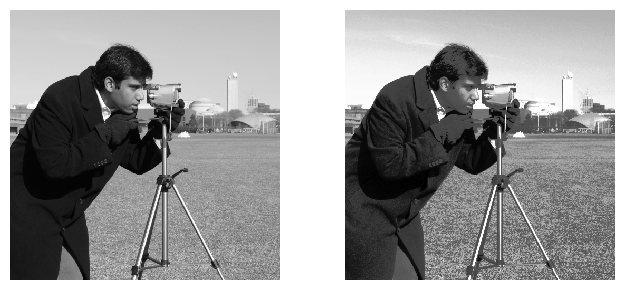

In [22]:
plt.figure(figsize=(7, 3))

plt.subplot(121)
plt.imshow(camera, cmap="gray", interpolation="nearest")
plt.axis("off")
plt.subplot(122)
plt.imshow(camera_equalized, cmap="gray", interpolation="nearest")
plt.axis("off")
plt.tight_layout()

### Mathematical morphology

See [wikipedia](https://en.wikipedia.org/wiki/Mathematical_morphology)
for an introduction on mathematical morphology.

Probe an image with a simple shape (a **structuring element**), and
modify this image according to how the shape locally fits or misses the
image.

Default structuring element: 4-connectivity of a pixel

In [23]:
# Import structuring elements to make them more easily accessible
from skimage.morphology import disk, diamond

In [24]:
diamond(1)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

![](../../advanced/image_processing/diamond_kernel.png)

**Erosion** = minimum filter. Replace the value of a pixel by the minimal value covered by the structuring element.:

In [25]:
a = np.zeros((7,7), dtype=np.uint8)
a[1:6, 2:5] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [26]:
ski.morphology.binary_erosion(a, diamond(1)).astype(np.uint8)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [27]:
#Erosion removes objects smaller than the structure
ski.morphology.binary_erosion(a, diamond(2)).astype(np.uint8)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

**Dilation**: maximum filter:

In [28]:
a = np.zeros((5, 5))
a[2, 2] = 1
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [29]:
ski.morphology.binary_dilation(a, diamond(1)).astype(np.uint8)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

**Opening**: erosion + dilation:

In [30]:
a = np.zeros((5,5), dtype=int)
a[1:4, 1:4] = 1; a[4, 4] = 1
a

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

In [31]:
ski.morphology.binary_opening(a, diamond(1)).astype(np.uint8)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

Opening removes small objects and smoothes corners.

:::{admonition} Grayscale mathematical morphology

Mathematical morphology operations are also available for
(non-binary) grayscale images (int or float type). Erosion and dilation
correspond to minimum (resp. maximum) filters.

:::

Higher-level mathematical morphology are available: tophat,
skeletonization, etc.

:::{admonition} See also

Basic mathematical morphology is also implemented in
{mod}`scipy.ndimage.morphology`. The `scipy.ndimage` implementation
works on arbitrary-dimensional arrays.

:::

---

### Example of filters comparison: image denoising

In [32]:
coins = ski.data.coins()
coins_zoom = coins[10:80, 300:370]
median_coins = ski.filters.median(
    coins_zoom, disk(1)
)
tv_coins = ski.restoration.denoise_tv_chambolle(
    coins_zoom, weight=0.1
)
gaussian_filter_coins = ski.filters.gaussian(coins, sigma=2)
med_filter_coins = ski.filters.median(coins, np.ones((3, 3)))
tv_filter_coins = ski.restoration.denoise_tv_chambolle(coins, weight=0.1)

Text(0.5, 1.0, 'TV filter')

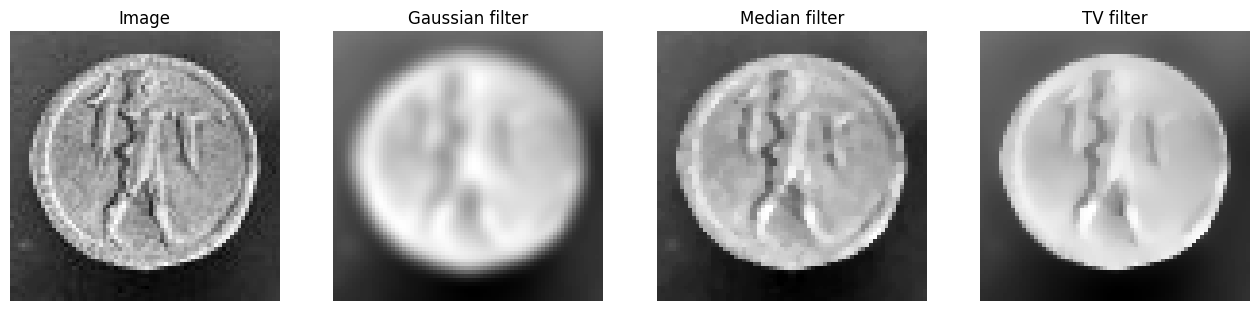

In [33]:
plt.figure(figsize=(16, 4))
plt.subplot(141)
plt.imshow(coins[10:80, 300:370], cmap="gray", interpolation="nearest")
plt.axis("off")
plt.title("Image")
plt.subplot(142)
plt.imshow(gaussian_filter_coins[10:80, 300:370], cmap="gray", interpolation="nearest")
plt.axis("off")
plt.title("Gaussian filter")
plt.subplot(143)
plt.imshow(med_filter_coins[10:80, 300:370], cmap="gray", interpolation="nearest")
plt.axis("off")
plt.title("Median filter")
plt.subplot(144)
plt.imshow(tv_filter_coins[10:80, 300:370], cmap="gray", interpolation="nearest")
plt.axis("off")
plt.title("TV filter")

## Image segmentation

Image segmentation is the attribution of different labels to different
regions of the image, for example in order to extract the pixels of an
object of interest.

### Binary segmentation: foreground + background

#### Histogram-based method: **Otsu thresholding**

::: {note}
:class: dropdown

The [Otsu method](https://en.wikipedia.org/wiki/Otsu%27s_method) is a
simple heuristic to find a threshold to separate the foreground from
the background.
:::

:::{sidebar} Earlier scikit-image versions
{mod}`skimage.filters` is called {mod}`skimage.filter` in earlier
versions of scikit-image
:::

In [34]:
camera = ski.data.camera()
val = ski.filters.threshold_otsu(camera)
mask = camera < val

In [35]:
# The histogram from which Otsu calculated the threshold.
hist, bins_center = ski.exposure.histogram(camera)

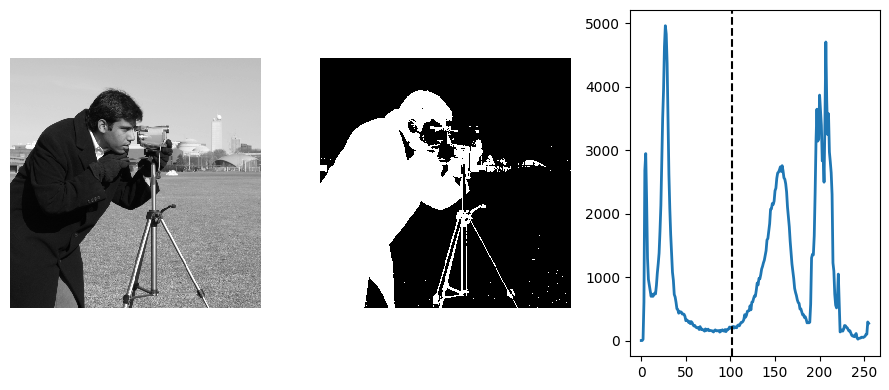

In [36]:
plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(camera, cmap="gray", interpolation="nearest")
plt.axis("off")
plt.subplot(132)
plt.imshow(mask, cmap="gray", interpolation="nearest")
plt.axis("off")
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color="k", ls="--")

plt.tight_layout()

#### Labeling connected components of a discrete image

::: {note}
:class: dropdown

Once you have separated foreground objects, it is use to separate them
from each other. For this, we can assign a different integer labels to
each one.
:::

Synthetic data:

In [37]:
n = 20
l = 256
im = np.zeros((l, l))
rng = np.random.default_rng()
points = l * rng.random((2, n ** 2))
im[(points[0]).astype(int), (points[1]).astype(int)] = 1
im = ski.filters.gaussian(im, sigma=l / (4. * n))
blobs = im > im.mean()

Label all connected components:

In [38]:
all_labels = ski.measure.label(blobs)

Label only foreground connected components:

In [39]:
blobs_labels = ski.measure.label(blobs, background=0)

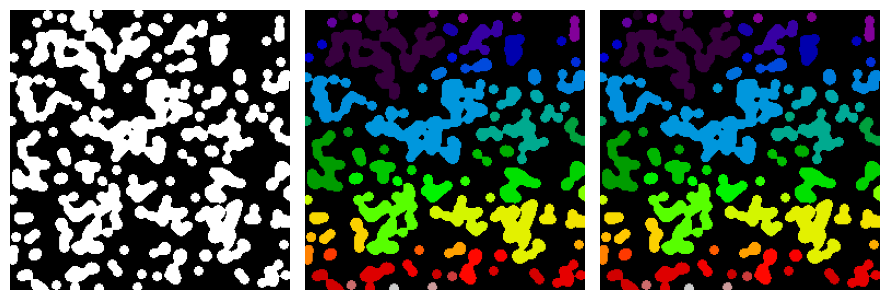

In [40]:
plt.figure(figsize=(9, 3.5))
plt.subplot(131)
plt.imshow(blobs, cmap="gray")
plt.axis("off")
plt.subplot(132)
plt.imshow(all_labels, cmap="nipy_spectral")
plt.axis("off")
plt.subplot(133)
plt.imshow(blobs_labels, cmap="nipy_spectral")
plt.axis("off")

plt.tight_layout()

:::{admonition} See also

{func}`scipy.ndimage.find_objects` is useful to return slices on
object in an image.
:::

### Marker based methods

If you have markers inside a set of regions, you can use these to segment
the regions.

#### _Watershed_ segmentation

The Watershed ({func}`skimage.segmentation.watershed`) is a region-growing
approach that fills "basins" in the image

In [41]:
# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1 ** 2
mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2 ** 2
image = np.logical_or(mask_circle1, mask_circle2)
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance
# to the background
# Use scipy.ndimage.distance_transform_edt
distance = sp.ndimage.distance_transform_edt(image)
peak_idx = ski.feature.peak_local_max(
    distance, footprint=np.ones((3, 3)), labels=image
)
peak_mask = np.zeros_like(distance, dtype=bool)
peak_mask[tuple(peak_idx.T)] = True
markers = ski.morphology.label(peak_mask)
labels_ws = ski.segmentation.watershed(
    -distance, markers, mask=image
)

#### _Random walker_ segmentation

The random walker algorithm ({func}`skimage.segmentation.random_walker`)
is similar to the Watershed, but with a more "probabilistic" approach. It
is based on the idea of the diffusion of labels in the image:

In [42]:
# Transform markers image so that 0-valued pixels are to
# be labelled, and -1-valued pixels represent background
markers[~image] = -1
labels_rw = ski.segmentation.random_walker(image, markers)

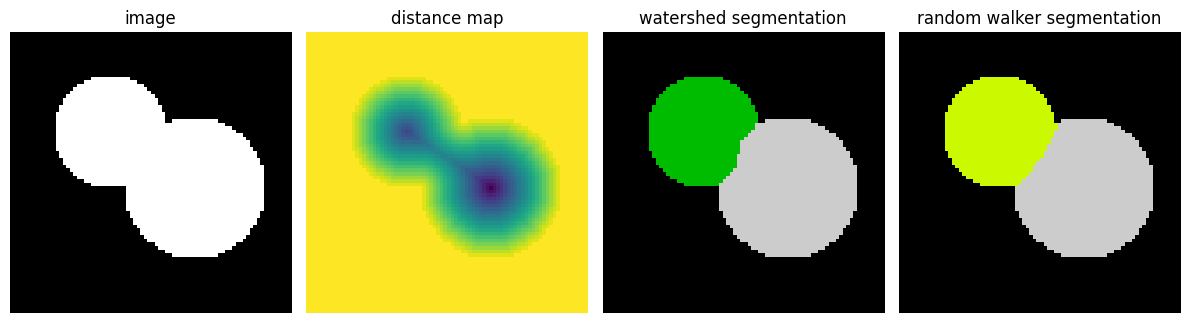

In [43]:
plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(image, cmap="gray", interpolation="nearest")
plt.axis("off")
plt.title("image")
plt.subplot(142)
plt.imshow(-distance, interpolation="nearest")
plt.axis("off")
plt.title("distance map")
plt.subplot(143)
plt.imshow(labels_ws, cmap="nipy_spectral", interpolation="nearest")
plt.axis("off")
plt.title("watershed segmentation")
plt.subplot(144)
plt.imshow(labels_rw, cmap="nipy_spectral", interpolation="nearest")
plt.axis("off")
plt.title("random walker segmentation")

plt.tight_layout()

:::{admonition} Postprocessing label images
`skimage` provides several utility functions that can be used on
label images (ie images where different discrete values identify
different regions). Functions names are often self-explaining:
{func}`skimage.segmentation.clear_border`,
{func}`skimage.segmentation.relabel_from_one`,
{func}`skimage.morphology.remove_small_objects`, etc.
:::

::: {exercise-start}
:label: ski-coins-otsu-ex
:class: dropdown
:::

- Load the `coins` image from the `data` submodule.
- Separate the coins from the background by testing several
  segmentation methods: Otsu thresholding, adaptive thresholding, and
  watershed or random walker segmentation.
- If necessary, use a postprocessing function to improve the coins /
  background segmentation.

::: {exercise-end}
:::

## Measuring regions' properties

Example: compute the size and perimeter of the two segmented regions:

In [44]:
properties = ski.measure.regionprops(labels_rw)
[float(prop.area) for prop in properties]

[770.0, 1168.0]

In [45]:
[prop.perimeter for prop in properties]

[np.float64(100.91168824543142), np.float64(126.81118318204308)]

:::{admonition} See also

for some properties, functions are available as well in
{mod}`scipy.ndimage.measurements` with a different API (a list is
returned).
:::

::: {exercise-start}
:label: ski-coin-labels-ex
:class: dropdown
:::

- Use the binary image of the coins and background from the previous
  exercise.
- Compute an image of labels for the different coins.
- Compute the size and eccentricity of all coins.

::: {exercise-end}
:::

## Data visualization and interaction

Meaningful visualizations are useful when testing a given processing
pipeline.

Some image processing operations:

In [46]:
coins = ski.data.coins()
mask = coins > ski.filters.threshold_otsu(coins)
clean_border = ski.segmentation.clear_border(mask)

Visualize binary result:

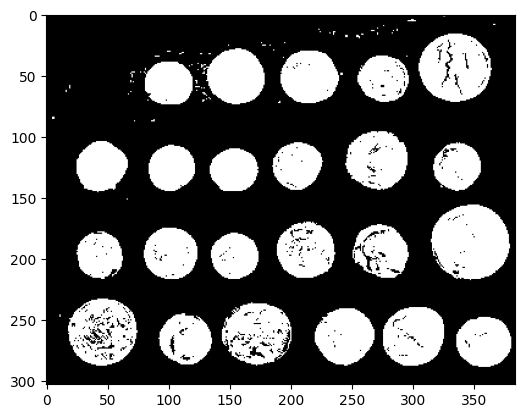

In [47]:
plt.figure()
plt.imshow(clean_border, cmap='gray')

Visualize contour

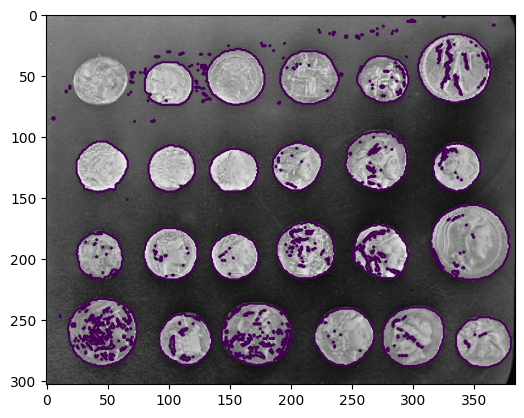

In [48]:
plt.figure()
plt.imshow(coins, cmap='gray')
plt.contour(clean_border, [0.5])

Use `skimage` dedicated utility function:

In [49]:
coins_edges = ski.segmentation.mark_boundaries(
    coins, clean_border.astype(int)
)

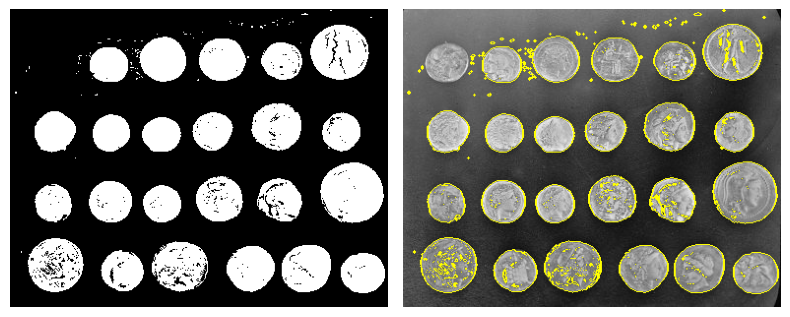

In [50]:
plt.figure(figsize=(8, 3.5))
plt.subplot(121)
plt.imshow(clean_border, cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(coins_edges)
plt.axis("off")

plt.tight_layout()

## Feature extraction for computer vision

Geometric or textural descriptor can be extracted from images in order to

- classify parts of the image (e.g. sky vs. buildings)
- match parts of different images (e.g. for object detection)
- and many other applications of
  [Computer Vision](https://en.wikipedia.org/wiki/Computer_vision)

Example: detecting corners using Harris detector

In [51]:
tform = ski.transform.AffineTransform(
    scale=(1.3, 1.1), rotation=1, shear=0.7,
    translation=(210, 50)
)

image = ski.transform.warp(
    ski.data.checkerboard(), tform.inverse, output_shape=(350, 350)
)

coords = ski.feature.corner_peaks(
    ski.feature.corner_harris(image), min_distance=5
)
coords_subpix = ski.feature.corner_subpix(
    image, coords, window_size=13
)

(np.float64(-23.504322001100714),
 np.float64(349.5),
 np.float64(349.5),
 np.float64(-0.5))

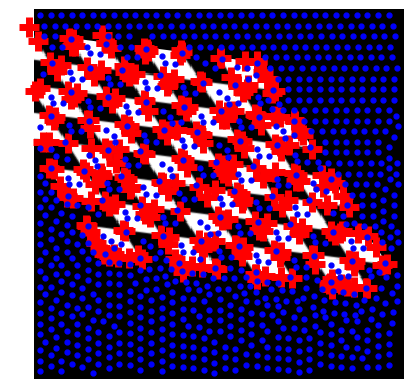

In [52]:
plt.gray()
plt.imshow(image, interpolation="nearest")
plt.plot(coords_subpix[:, 1], coords_subpix[:, 0], "+r", markersize=15, mew=5)
plt.plot(coords[:, 1], coords[:, 0], ".b", markersize=7)
plt.axis("off")

(this example is taken from the [plot_corner](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_corner.html)
example in scikit-image)

Points of interest such as corners can then be used to match objects in
different images, as described in the [plot_matching](https://scikit-image.org/docs/stable/auto_examples/transform/plot_matching.html)
example of scikit-image.